## Creating synthetic data for K-Means

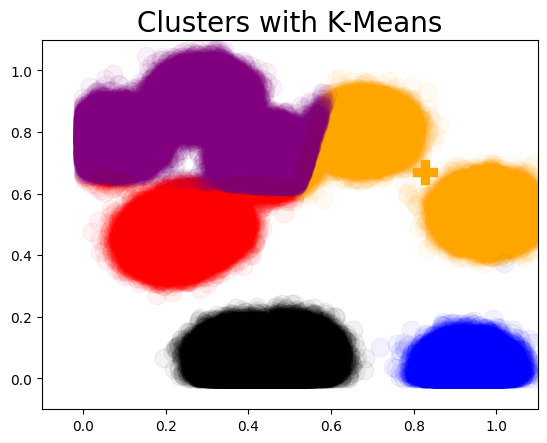

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Indicate the number of points
n_points = 1000000
# randomly generating data points and noise 
points, y_true = make_blobs(n_samples=n_points, 
                            centers=10, 
                            cluster_std=0.04, 
                            random_state=7,
                            center_box=(0, 1.0))

# only positive points and with three decimals
points = np.round(np.abs(points), 3)

# storing points into a csv file
np.savetxt(str(n_points)+"_data.csv", points, delimiter=",",  fmt="%.3f")

# creating a dataframe

points_df = pd.DataFrame()
points_df["x"] = points[:, 0]
points_df["y"] = points[:, 1]

clusters = 5
# clustering with kmeans
kmeans = KMeans(n_clusters=clusters).fit(points)

points_df["cluster"] = kmeans.labels_


# Plotting clusters


colors = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(clusters):
    plt.scatter(points_df[points_df["cluster"] == cluster]["x"],
                points_df[points_df["cluster"] == cluster]["y"],
                marker="o", s=180, color=colors[cluster], alpha=0.05)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colors[cluster])

plt.title("Clusters with K-Means", fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()


## Plotting the results of my C++ program

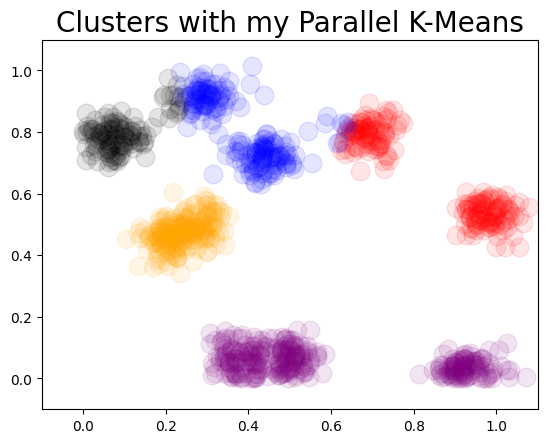

In [11]:
# loading results from c++ program into a dataframe

df = pd.read_csv(str(n_points)+"_results.csv")
df.columns = ["x", "y", "cluster"]
                 
for cluster in range(clusters):
    plt.scatter(df[df["cluster"] == cluster]["x"],
                df[df["cluster"] == cluster]["y"],
                marker="o", s=180, color=colors[cluster], alpha=0.1)
    
plt.title("Clusters with my Parallel K-Means", fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

plt.show()